# CPSC8810_HW1-1 Simulate a Function

## Task1-1

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()
import matplotlib.pyplot as plt

In [2]:
import numpy as np
X =np.expand_dims(np.arange(0.0, 3.0, 0.01),1)
Y =np.sinc(X)
x = tf.placeholder(tf.float64, [300,1], name='x')
y = tf.placeholder(tf.float64, [300,1], name='y')

# Utilizing two functions to compare two models


## Function 1

### f(x) = sin(5πx) / 5πx


## Function 2

### f(x) = sgn(sin(5πx))

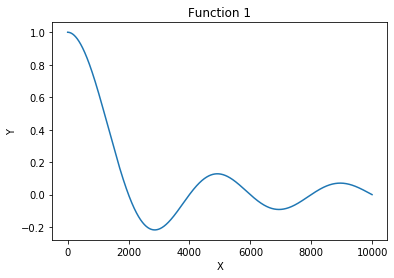

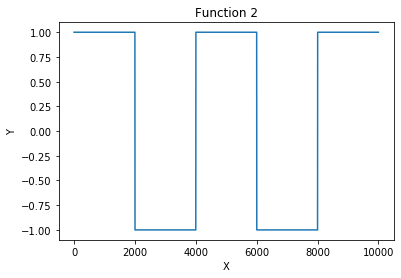

In [3]:
X = np.arange(0.0001,1,0.0001)
X_train = X.reshape(-1,1).astype(np.float32)
Y1 = np.sin(5*np.pi*X)/(5*np.pi*X)
Y1_train = Y1.reshape(-1,1).astype(np.float32)
Y2 = np.sign(np.sin(5*np.pi*X))
Y2_train = Y2.reshape(-1,1).astype(np.float32)
plt.plot(Y1)
plt.title('Function 1')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

plt.plot(Y2)
plt.title('Function 2')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## Placeholder

In [4]:
tf.reset_default_graph()
x_input = tf.placeholder(tf.float32,shape=[None,1])
y_output = tf.placeholder(tf.float32,shape=[None,1])

## Task 1.1


### 1.1.1  Model A

In [5]:
input_layer_A = tf.layers.dense(x_input, 5, activation= tf.nn.leaky_relu, name = 'modelA_1')
hidden_layer1_A = tf.layers.dense(input_layer_A,10,activation=tf.nn.leaky_relu, name = 'modelA_2')
hidden_layer2_A = tf.layers.dense(hidden_layer1_A,10,activation=tf.nn.leaky_relu, name = 'modelA_3')
hidden_layer3_A = tf.layers.dense(hidden_layer2_A,10,activation=tf.nn.leaky_relu, name = 'modelA_4')
hidden_layer4_A = tf.layers.dense(hidden_layer3_A,10,activation=tf.nn.leaky_relu, name = 'modelA_5')
hidden_layer5_A = tf.layers.dense(hidden_layer4_A,10,activation=tf.nn.leaky_relu, name = 'modelA_6')
hidden_layer6_A = tf.layers.dense(hidden_layer5_A,5,activation=tf.nn.leaky_relu, name = 'modelA_7')
output_layer_A = tf.layers.dense(hidden_layer6_A,1, name = 'modelA_8')



Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


### 1.1.2 Loss Function

In [6]:
Loss_A =tf.losses.mean_squared_error(y_output , output_layer_A)
Optimizer_A = tf.train.AdamOptimizer(learning_rate= 0.05).minimize(Loss_A)
init_A = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### 1.1.3 Parameters Count

In [7]:
total_parameters_A = 0
for variable in tf.trainable_variables():
        print(variable)
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        print("Parameter Num:", variable_parameters)
        total_parameters_A += variable_parameters
print("Total Parameter:", total_parameters_A)

<tf.Variable 'modelA_1/kernel:0' shape=(1, 5) dtype=float32_ref>
Parameter Num: 5
<tf.Variable 'modelA_1/bias:0' shape=(5,) dtype=float32_ref>
Parameter Num: 5
<tf.Variable 'modelA_2/kernel:0' shape=(5, 10) dtype=float32_ref>
Parameter Num: 50
<tf.Variable 'modelA_2/bias:0' shape=(10,) dtype=float32_ref>
Parameter Num: 10
<tf.Variable 'modelA_3/kernel:0' shape=(10, 10) dtype=float32_ref>
Parameter Num: 100
<tf.Variable 'modelA_3/bias:0' shape=(10,) dtype=float32_ref>
Parameter Num: 10
<tf.Variable 'modelA_4/kernel:0' shape=(10, 10) dtype=float32_ref>
Parameter Num: 100
<tf.Variable 'modelA_4/bias:0' shape=(10,) dtype=float32_ref>
Parameter Num: 10
<tf.Variable 'modelA_5/kernel:0' shape=(10, 10) dtype=float32_ref>
Parameter Num: 100
<tf.Variable 'modelA_5/bias:0' shape=(10,) dtype=float32_ref>
Parameter Num: 10
<tf.Variable 'modelA_6/kernel:0' shape=(10, 10) dtype=float32_ref>
Parameter Num: 100
<tf.Variable 'modelA_6/bias:0' shape=(10,) dtype=float32_ref>
Parameter Num: 10
<tf.Variable

### 1.1.4 Trainning with Function 1

In [8]:
sess = tf.Session()
loss_list_A_1=[]
sess.run(init_A)
for i in range(0,1000):
  fdA_1 ={x_input:X_train, y_output:Y1_train}
  _, loss_val_A_1 = sess.run([Optimizer_A, Loss_A], feed_dict=fdA_1)
  #print ('loss = %s' % loss_val_1)
  loss_list_A_1.append(loss_val_A_1)

YPA_1 = sess.run(output_layer_A,feed_dict={x_input:X_train})

### 1.1.5 Trainning with Function 2

In [9]:
sess = tf.Session()
loss_list_A_2=[]
sess.run(init_A)
for i in range(0,1000):
  fdA_2 ={x_input:X_train, y_output:Y2_train}
  _, loss_val_A_2 = sess.run([Optimizer_A, Loss_A], feed_dict=fdA_2)
  #print ('loss = %s' % loss_val_2)
  loss_list_A_2.append(loss_val_A_2)

YPA_2 = sess.run(output_layer_A,feed_dict={x_input:X_train})

### 1.1.6 Plot Model A

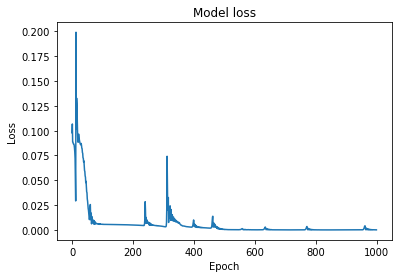

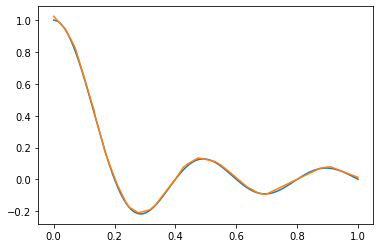

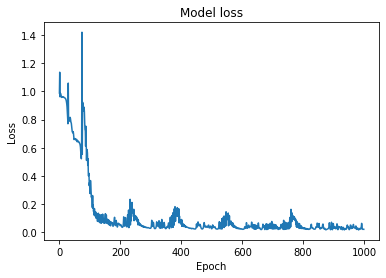

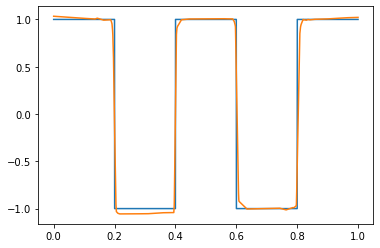

In [10]:
# Plot training  loss values
plt.plot(loss_list_A_1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(X_train,Y1_train)
plt.plot(X_train,YPA_1)
plt.show()

plt.plot(loss_list_A_2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(X_train,Y2_train)
plt.plot(X_train,YPA_2)
plt.show()

### 1.2.1 Model B

In [11]:
tf.reset_default_graph()
x_input = tf.placeholder(tf.float32,shape=[None,1])
y_output = tf.placeholder(tf.float32,shape=[None,1])

In [12]:
input_layer_B = tf.layers.dense(x_input, 10, activation= tf.nn.leaky_relu, name = 'modelB_1')
hidden_layer1_B = tf.layers.dense(input_layer_B,18,activation=tf.nn.leaky_relu, name = 'modelB_2')
hidden_layer2_B = tf.layers.dense(hidden_layer1_B,15,activation=tf.nn.leaky_relu, name = 'modelB_3')
hidden_layer3_B = tf.layers.dense(hidden_layer2_B,4,activation=tf.nn.leaky_relu, name = 'modelB_4')
output_layer_B = tf.layers.dense(hidden_layer3_B,1, name = 'modelB_8')

### 1.2.2 Loss Function

In [13]:
Loss_B =tf.losses.mean_squared_error(y_output , output_layer_B)
Optimizer_B = tf.train.AdamOptimizer(learning_rate= 0.05).minimize(Loss_B)
init_B = tf.global_variables_initializer()

### 1.2.3 Parameters Count

In [14]:
total_parameters_B = 0
for variable in tf.trainable_variables():
        print(variable)
        shape = variable.get_shape()
        variable_parameters = 1
        for dim in shape:
            variable_parameters *= dim.value
        print("Parameter Num:", variable_parameters)
        total_parameters_B += variable_parameters
print("Total Parameter:", total_parameters_B)

<tf.Variable 'modelB_1/kernel:0' shape=(1, 10) dtype=float32_ref>
Parameter Num: 10
<tf.Variable 'modelB_1/bias:0' shape=(10,) dtype=float32_ref>
Parameter Num: 10
<tf.Variable 'modelB_2/kernel:0' shape=(10, 18) dtype=float32_ref>
Parameter Num: 180
<tf.Variable 'modelB_2/bias:0' shape=(18,) dtype=float32_ref>
Parameter Num: 18
<tf.Variable 'modelB_3/kernel:0' shape=(18, 15) dtype=float32_ref>
Parameter Num: 270
<tf.Variable 'modelB_3/bias:0' shape=(15,) dtype=float32_ref>
Parameter Num: 15
<tf.Variable 'modelB_4/kernel:0' shape=(15, 4) dtype=float32_ref>
Parameter Num: 60
<tf.Variable 'modelB_4/bias:0' shape=(4,) dtype=float32_ref>
Parameter Num: 4
<tf.Variable 'modelB_8/kernel:0' shape=(4, 1) dtype=float32_ref>
Parameter Num: 4
<tf.Variable 'modelB_8/bias:0' shape=(1,) dtype=float32_ref>
Parameter Num: 1
Total Parameter: 572


### 1.2.4 Trainning with Function 1

In [15]:
sess = tf.Session()
loss_list_B_1=[]
sess.run(init_B)
for i in range(0,1000):
  fdB_1 ={x_input:X_train, y_output:Y1_train}
  _, loss_val_B_1 = sess.run([Optimizer_B, Loss_B], feed_dict=fdB_1)
  #print ('loss = %s' % loss_val_1)
  loss_list_B_1.append(loss_val_B_1)

YPB_1 = sess.run(output_layer_B,feed_dict={x_input:X_train})

### 1.2.5 Trainning with Function 2

In [16]:
sess = tf.Session()
loss_list_B_2=[]
sess.run(init_B)
for i in range(0,1000):
  fdB_2 ={x_input:X_train, y_output:Y1_train}
  _, loss_val_B_2 = sess.run([Optimizer_B, Loss_B], feed_dict=fdB_1)
  print ('loss = %s' % loss_val_B_2)
  loss_list_B_2.append(loss_val_B_2)

YPB_2 = sess.run(output_layer_B,feed_dict={x_input:X_train})

### 1.2.6 Plot Model B

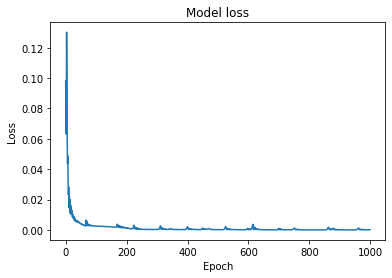

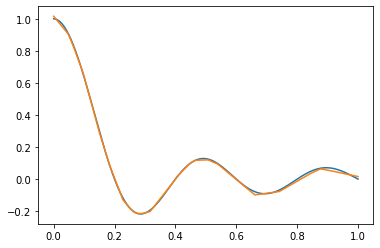

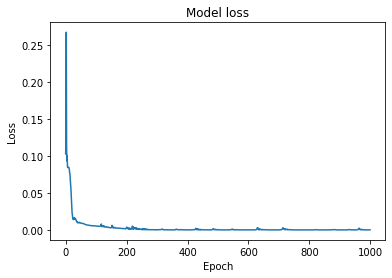

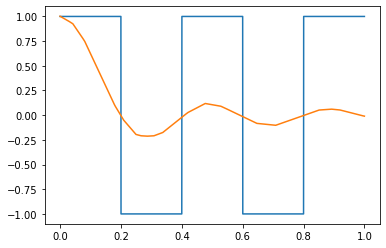

In [17]:
# Plot training  loss values
plt.plot(loss_list_B_1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(X_train,Y1_train)
plt.plot(X_train,YPB_1)
plt.show()

plt.plot(loss_list_B_2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(X_train,Y2_train)
plt.plot(X_train,YPB_2)
plt.show()

### Plot function 1 in the same figure

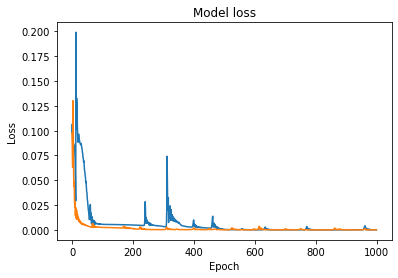

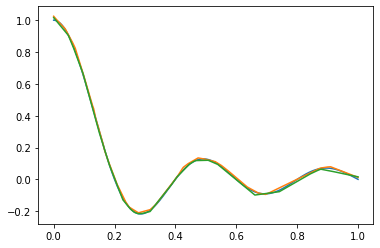

In [18]:
plt.plot(loss_list_A_1)
plt.plot(loss_list_B_1)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(X_train,Y1_train)
plt.plot(X_train,YPA_1)
plt.plot(X_train,YPB_1)
plt.show()




### Plot function 2 in the same figure

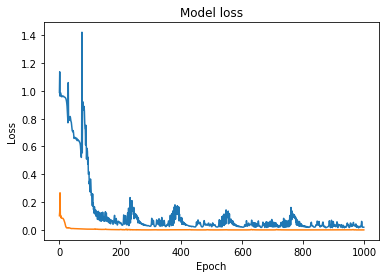

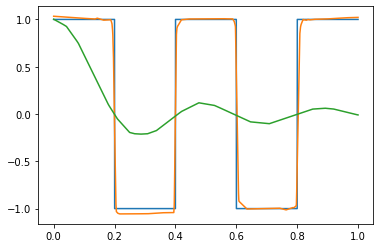

In [19]:
plt.plot(loss_list_A_2)
plt.plot(loss_list_B_2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(X_train,Y2_train)
plt.plot(X_train,YPA_2)
plt.plot(X_train,YPB_2)
plt.show()

